___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [9]:
len(df)

2000

In [14]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [4]:
#CODE HERE
df.isna().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [15]:
df = df.dropna()

In [58]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [35]:
import re

In [34]:
len(df[df['review'] == " "])

0

In [46]:
df['review'].apply(lambda x: re.search(" ",x))

0        <re.Match object; span=(3, 4), match=' '>
1        <re.Match object; span=(4, 5), match=' '>
2        <re.Match object; span=(4, 5), match=' '>
3       <re.Match object; span=(9, 10), match=' '>
4        <re.Match object; span=(2, 3), match=' '>
                           ...                    
1995     <re.Match object; span=(1, 2), match=' '>
1996     <re.Match object; span=(2, 3), match=' '>
1997     <re.Match object; span=(3, 4), match=' '>
1998     <re.Match object; span=(1, 2), match=' '>
1999     <re.Match object; span=(1, 2), match=' '>
Name: review, Length: 1965, dtype: object

In [60]:
df['review'].apply(lambda x: x.isspace()).sum()

27

In [61]:
#df[df['review'] == ''].index

In [62]:
#df[ (df['review'].notnull()) & (df['review']!=u'') ].index


In [63]:
#df['review'].eq('').sum()

In [85]:
df[df['review'].apply(lambda x: x.isspace()) == True]['review'] == 'Spacex'

57      False
71      False
147     False
151     False
283     False
307     False
313     False
323     False
343     False
351     False
427     False
501     False
633     False
675     False
815     False
851     False
977     False
1079    False
1299    False
1455    False
1493    False
1525    False
1531    False
1763    False
1851    False
1905    False
1993    False
Name: review, dtype: bool

In [95]:
df[df['review'].apply(lambda x: x.isspace())==True].index

Int64Index([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,
             501,  633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525,
            1531, 1763, 1851, 1905, 1993],
           dtype='int64')

In [96]:
dropindex = df[df['review'].apply(lambda x: x.isspace())==True].index

In [101]:
dropindex = pd.Series(dropindex)

In [104]:
dropindex.head()

0     57
1     71
2    147
3    151
4    283
dtype: int64

In [113]:
df.iloc[57]

label     neg
review       
Name: 57, dtype: object

In [119]:
#for n in dropindex:
df = df.drop(dropindex)

In [253]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


27

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [121]:
#CODE HERE
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [126]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [130]:
tfid = TfidfVectorizer(stop_words='english')
count = CountVectorizer(stop_words='english')

In [134]:
X = df['review']

In [135]:
y = df['label']

In [144]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [236]:
df[df['label'] == 'pos']

,label,review
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
11,pos,"with stars like sigourney weaver ( "" alien "" t..."
16,pos,i remember hearing about this film when it fir...
18,pos,garry shandling makes his long overdue starrin...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [243]:
posdf = df[df['label'] == 'pos']

In [244]:
posdf.head()

,label,review
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
11,pos,"with stars like sigourney weaver ( "" alien "" t..."
16,pos,i remember hearing about this film when it fir...
18,pos,garry shandling makes his long overdue starrin...


In [216]:
#posbow = count.fit_transform(posdf['review'])

In [222]:
#posbow

<969x29459 sparse matrix of type '<class 'numpy.int64'>'
	with 247042 stored elements in Compressed Sparse Row format>

In [217]:
#count.vocabulary_.keys()

In [218]:
#pd.DataFrame(data=count.vocabulary_.items(),columns =['word','count'])

In [219]:
#posdfvb = pd.DataFrame(data=count.vocabulary_.items(),columns =['word','count'])

In [220]:
#posdfvb = posdfvb.set_index('word')

In [246]:
vec = CountVectorizer(stop_words='english').fit(posdf['review'])
bag_of_words = vec.transform(posdf['review'])
sum_words = bag_of_words.sum(axis=0) 
pwords_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
pwords_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#return words_freq[:n]

In [247]:
pwords_freq[:20]

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [248]:
negdf = df[df['label'] == 'neg']
vec = CountVectorizer(stop_words='english').fit(negdf['review'])
bag_of_words = vec.transform(negdf['review'])
sum_words = bag_of_words.sum(axis=0) 
nwords_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
nwords_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#return words_freq[:n]

In [249]:
nwords_freq[:20]

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [262]:
#CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [263]:
tfid = TfidfVectorizer(stop_words='english')
count = CountVectorizer(stop_words='english')

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [264]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
model = LinearSVC()

pipe = Pipeline([('tfid',tfid),('model',model)])

In [265]:
pipe

Pipeline(steps=[('tfid', TfidfVectorizer(stop_words='english')),
                ('model', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [266]:
#CODE HERE
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer(stop_words='english')),
                ('model', LinearSVC())])

In [267]:
y_pred = pipe.predict(X_test)

In [259]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [268]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       188
         pos       0.84      0.86      0.85       200

    accuracy                           0.85       388
   macro avg       0.85      0.84      0.85       388
weighted avg       0.85      0.85      0.85       388



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



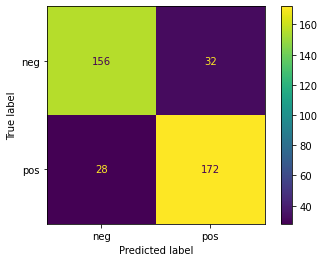

In [271]:
plot_confusion_matrix(pipe,X_test,y_test)

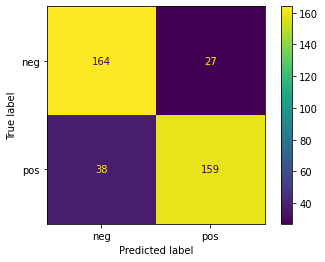

## Great job!